In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
from factor_analyzer import FactorAnalyzer
from sklearn import preprocessing
import statistics

In [2]:
#Get Data
dataset = pd.read_csv('desktop/v_shipment.csv')
dataset

/Users/barankilic/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,17,40,41,42,43,47,48,50,51,52,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
0,PS6AP2DU,EUR,CANCELED,NaN,NaN,2022-02-11 11:14:41.602,2022-02-11 11:10:22.380,NaN,620643c46ecc56658317d86a,465.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
1,TC0KXIOZ,TRY,CANCELED,NaN,NaN,2022-02-17 13:55:37.242,2022-02-14 09:19:45.624,NaN,620a1e7a9fa329591220165a,5907.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Antalya
2,M4AH4DP8,TRY,CANCELED,NaN,NaN,2022-02-17 13:49:35.448,2022-02-17 13:36:29.193,NaN,620e4f40d1ddb926d6162e16,8000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Rotterdam
3,3OM42TU0,TRY,CANCELED,NaN,NaN,2022-02-07 07:15:22.752,2022-02-05 13:16:38.813,NaN,61fe787b4df0683a0fc34bad,448.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
4,ZK0BMR15,EUR,OPEN,NaN,NaN,2022-02-17 11:17:17.628,2022-02-17 09:45:20.166,NaN,620e1914c6ac5460e59eb2b4,1700.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.00,NaN,Ankara_Essen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [3]:
dataset = dataset[dataset.invoice_company_title != 'TRENDYOL LOJISTIK A.Ş']
#dataset = dataset[dataset.invoice_company_title != 'KARSAC HAVALANDIRMA ISITMA SOGUTMA TAAHHÜT SAN.VE TIC.LTD.STI']
#dataset = dataset[dataset.invoice_company_title != 'OTOKOÇ OTOMOTİV TİC. VE SAN A.Ş. BİRMOT']
#dataset = dataset[dataset.invoice_company_title != 'OMSAN LOJİSTİK A.Ş.']
#dataset = dataset[dataset.invoice_company_title != 'KUEHNE NAGEL NAKLİYAT LTD ŞTİ - INTERMODAL']

dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
0,PS6AP2DU,EUR,CANCELED,NaN,NaN,2022-02-11 11:14:41.602,2022-02-11 11:10:22.380,NaN,620643c46ecc56658317d86a,465.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
1,TC0KXIOZ,TRY,CANCELED,NaN,NaN,2022-02-17 13:55:37.242,2022-02-14 09:19:45.624,NaN,620a1e7a9fa329591220165a,5907.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Antalya
2,M4AH4DP8,TRY,CANCELED,NaN,NaN,2022-02-17 13:49:35.448,2022-02-17 13:36:29.193,NaN,620e4f40d1ddb926d6162e16,8000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Rotterdam
3,3OM42TU0,TRY,CANCELED,NaN,NaN,2022-02-07 07:15:22.752,2022-02-05 13:16:38.813,NaN,61fe787b4df0683a0fc34bad,448.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
4,ZK0BMR15,EUR,OPEN,NaN,NaN,2022-02-17 11:17:17.628,2022-02-17 09:45:20.166,NaN,620e1914c6ac5460e59eb2b4,1700.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.00,NaN,Ankara_Essen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [4]:
# Get Delivered Shipments
accepted = ('APPROVED', 'IN_TRANSIT', 'IN_DELIVERY', 'IN_CROSSDOCK', 'DELIVERED', 'IN_PICKUP')

dataset = dataset[dataset.latest_status.isin(accepted)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
17,UELFE3N7,TRY,APPROVED,iç nakliye,NaN,2022-02-15 12:48:27.560,2022-02-15 11:15:24.685,NaN,620b8b420010845a7253d5c6,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1.0,Mersin_İstanbul
18,T5L16VEU,TRY,APPROVED,iç nakliye,NaN,2022-02-15 12:48:39.953,2022-02-15 11:15:24.685,NaN,620b8b420010845a7253d5c6,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1.0,Mersin_İstanbul
19,7UW6C5LA,TRY,APPROVED,NaN,NaN,2022-02-17 12:55:14.152,2022-02-17 12:36:58.196,NaN,620e4165775c6e6c2853107a,8500.00,...,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,1.0,İstanbul_Kocaeli
22,WKDIKX54,TRY,APPROVED,Brandasının sağlam olması gerekiyor.,NaN,2022-02-18 07:02:06.574,2022-02-18 06:38:27.200,Y22-2033,620f3ed6179cc56359f8b8f2,15000.00,...,NaN,NaN,NaN,NaN,NaN,3725.0,NaN,NaN,1.0,Kocaeli_Manisa
28,YOV8PTAB,TRY,APPROVED,NaN,NaN,2022-02-17 09:57:38.270,2022-02-17 09:54:51.406,NaN,620e1b67b35a1801923ec521,1854.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.00,NaN,İstanbul_Stara Zagora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [5]:
#Get Spot Prices
price_type = ['SPOT']
#dataset = dataset[dataset.price_type.isin(price_type)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
17,UELFE3N7,TRY,APPROVED,iç nakliye,NaN,2022-02-15 12:48:27.560,2022-02-15 11:15:24.685,NaN,620b8b420010845a7253d5c6,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1.0,Mersin_İstanbul
18,T5L16VEU,TRY,APPROVED,iç nakliye,NaN,2022-02-15 12:48:39.953,2022-02-15 11:15:24.685,NaN,620b8b420010845a7253d5c6,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1.0,Mersin_İstanbul
19,7UW6C5LA,TRY,APPROVED,NaN,NaN,2022-02-17 12:55:14.152,2022-02-17 12:36:58.196,NaN,620e4165775c6e6c2853107a,8500.00,...,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,1.0,İstanbul_Kocaeli
22,WKDIKX54,TRY,APPROVED,Brandasının sağlam olması gerekiyor.,NaN,2022-02-18 07:02:06.574,2022-02-18 06:38:27.200,Y22-2033,620f3ed6179cc56359f8b8f2,15000.00,...,NaN,NaN,NaN,NaN,NaN,3725.0,NaN,NaN,1.0,Kocaeli_Manisa
28,YOV8PTAB,TRY,APPROVED,NaN,NaN,2022-02-17 09:57:38.270,2022-02-17 09:54:51.406,NaN,620e1b67b35a1801923ec521,1854.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.00,NaN,İstanbul_Stara Zagora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [6]:
# GET pickup and dropoffs
routes = ('İstanbul_İstanbul', 'İstanbul_İzmir', 'İstanbul_Ankara', 'İstanbul_Kocaeli', 'İstanbul_Bursa',
          'İstanbul_Antalya', 'Kocaeli_İstanbul', 'İstanbul_Adana','İstanbul_Tekirdağ','İstanbul_Gaziantep',
          'İstanbul_Balıkesir','İstanbul_Eskişehir','İstanbul_Muğla','Kocaeli_İzmir','İstanbul_Mersin','İstanbul_Sakarya',
          'İstanbul_Samsun','Kocaeli_Ankara','İstanbul_Denizli','İstanbul_Kayseri')
dataset = dataset[dataset.routes.isin(routes)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
19,7UW6C5LA,TRY,APPROVED,NaN,NaN,2022-02-17 12:55:14.152,2022-02-17 12:36:58.196,NaN,620e4165775c6e6c2853107a,8500.0,...,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,1.0,İstanbul_Kocaeli
36,OPRPPJLC,TRY,APPROVED,NaN,NaN,2022-02-18 07:50:07.630,2022-02-17 11:52:53.991,NaN,620e37097f88244abc95194a,750.0,...,NaN,NaN,15.4899,13.6280,1.136623,135.0,9.91,8.72,NaN,İstanbul_Kocaeli
44,LZCXU45R,TRY,IN_PICKUP,NaN,NaN,2022-02-17 12:24:48.700,2022-02-17 12:16:11.160,NaN,NaN,1152.0,...,0.01,0.01,15.4899,13.6280,1.136623,664.0,48.72,42.87,2.0,Kocaeli_İzmir
51,KW6ELGIV,TRY,IN_PICKUP,NaN,NaN,2022-02-18 07:44:16.564,2022-02-18 07:37:46.718,5100244189,NaN,34.0,...,4.96,5.64,15.4899,13.6280,1.136623,409.5,30.05,26.44,2.0,İstanbul_Samsun
52,2ANOSFU7,TRY,IN_PICKUP,NaN,NaN,2022-02-18 07:44:16.564,2022-02-18 07:37:46.838,5100244164,NaN,2060.0,...,300.55,341.61,15.4899,13.6280,1.136623,679.8,49.88,43.89,2.0,İstanbul_İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47349,8GINZKBD,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,7.3367,6.7504,1.086854,243.0,36.00,33.12,NaN,İstanbul_Kayseri
47350,0HIH977T,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.440,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,7.3367,6.7504,1.086854,211.0,31.26,28.76,NaN,İstanbul_İstanbul
47351,GJB7JF6V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.450,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,7.3367,6.7504,1.086854,283.0,41.92,38.57,NaN,İstanbul_Muğla
47355,02GQTXWP,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.440,NaN,5e8c5f5b76cad97764139545,896.0,...,NaN,NaN,7.3367,6.7504,1.086854,363.0,53.77,49.48,NaN,İstanbul_İstanbul


In [7]:
# Get Applicable Columns
data = pd.concat([dataset['latest_status'],dataset['totalkgds'],dataset['pickup_city'],dataset['dropoff_city'] ,dataset['pickup_address_type'], dataset['dropoff_address_type'],
                  dataset['category'], dataset['price_type'], 
                  dataset['shipment_type'], dataset['vehicle_type'],dataset['vehicle_body_type'],
                  dataset['vehicle_package_type'], dataset['vehicle_way_of_loading'],
                  dataset['vehicle_tonnage_per_vehicle'],dataset['payment_option'],
                  dataset['invoice_type'], dataset['tenant_signup_flow'], 
                  dataset['total_cost_amount_in_tl'], dataset['usd_tl'],
                  dataset['price_base_amount_in_tl']
                 ,dataset['routes']], axis = 1)
data

,latest_status,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,price_type,shipment_type,vehicle_type,...,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,payment_option,invoice_type,tenant_signup_flow,total_cost_amount_in_tl,usd_tl,price_base_amount_in_tl,routes
19,APPROVED,8500.0,İstanbul,Kocaeli,WORKSPACE,WAREHOUSE,DRY_FOOD,MANUAL,FTL,_10_WHEELER,...,NaN,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,8.5,PAY_LATER,NaN,SELF_SIGNUP,NaN,NaN,1750.0,İstanbul_Kocaeli
36,APPROVED,750.0,İstanbul,Kocaeli,FACTORY,WAREHOUSE,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,13.6280,135.0,İstanbul_Kocaeli
44,IN_PICKUP,1152.0,Kocaeli,İzmir,WAREHOUSE,OTHER,OTHER,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,0.13,13.6280,664.0,Kocaeli_İzmir
51,IN_PICKUP,34.0,İstanbul,Samsun,FACTORY,WAREHOUSE,PLASTIC,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,76.84,13.6280,409.5,İstanbul_Samsun
52,IN_PICKUP,2060.0,İstanbul,İstanbul,FACTORY,WAREHOUSE,PLASTIC,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,4655.50,13.6280,679.8,İstanbul_İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47349,DELIVERED,448.0,İstanbul,Kayseri,WAREHOUSE,OTHER,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,6.7504,243.0,İstanbul_Kayseri
47350,DELIVERED,448.0,İstanbul,İstanbul,WAREHOUSE,OTHER,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,6.7504,211.0,İstanbul_İstanbul
47351,DELIVERED,448.0,İstanbul,Muğla,WAREHOUSE,OTHER,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,6.7504,283.0,İstanbul_Muğla
47355,DELIVERED,896.0,İstanbul,İstanbul,WAREHOUSE,OTHER,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,6.7504,363.0,İstanbul_İstanbul


In [8]:
#Split Data by Shipment Type
data_ftl = data[data.shipment_type == 'FTL']

In [9]:
data_ftl = data_ftl.drop(columns = 'shipment_type')
data_ftl = data_ftl.drop(columns = 'latest_status')
data_ftl = data_ftl.drop(columns = 'price_base_amount_in_tl')
data_ftl = data_ftl.drop(columns = 'price_type')


In [10]:
data_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 19 to 35181
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1121 non-null   float64
 1   pickup_city                  1121 non-null   object 
 2   dropoff_city                 1121 non-null   object 
 3   pickup_address_type          1121 non-null   object 
 4   dropoff_address_type         1121 non-null   object 
 5   category                     1121 non-null   object 
 6   vehicle_type                 1121 non-null   object 
 7   vehicle_body_type            1121 non-null   object 
 8   vehicle_package_type         1096 non-null   object 
 9   vehicle_way_of_loading       1121 non-null   object 
 10  vehicle_tonnage_per_vehicle  1121 non-null   float64
 11  payment_option               1121 non-null   object 
 12  invoice_type                 1038 non-null   object 
 13  tenant_signup_fl

In [11]:
data_ftl.describe(include = 'all')

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,payment_option,invoice_type,tenant_signup_flow,total_cost_amount_in_tl,usd_tl,routes
count,1121.000000,1121,1121,1121,1121,1121,1121,1121,1096,1121,1121.000000,1121,1038,1121,1106.000000,1120.000000,1121
unique,NaN,2,17,6,9,12,6,4,5,5,NaN,1,2,1,NaN,NaN,20
top,NaN,İstanbul,İstanbul,WAREHOUSE,OTHER,OTHER,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,NaN,PAY_LATER,E_INVOICE,SELF_SIGNUP,NaN,NaN,İstanbul_İstanbul
freq,NaN,807,385,465,419,535,637,634,853,838,NaN,1121,978,1121,NaN,NaN,242
mean,13903.343443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.510683,NaN,NaN,NaN,2276.480416,9.949680,NaN
std,9145.695788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,785.280364,NaN,NaN,NaN,1873.833507,2.060283,NaN
min,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,11.000000,8.260500,NaN
25%,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,900.000000,8.571850,NaN
50%,15000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,1900.000000,8.765500,NaN
75%,24750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.750000,NaN,NaN,NaN,3000.000000,10.715500,NaN


In [12]:
data_ftl = data_ftl.drop(columns = 'tenant_signup_flow')
data_ftl = data_ftl.drop(columns = 'payment_option')

In [13]:
labelencoder = LabelEncoder()
data_ftl['category'] = labelencoder.fit_transform(data_ftl['category'])
data_ftl['vehicle_type'] = labelencoder.fit_transform(data_ftl['vehicle_type'])
data_ftl['vehicle_body_type'] = labelencoder.fit_transform(data_ftl['vehicle_body_type'])
data_ftl['vehicle_package_type'] = labelencoder.fit_transform(data_ftl['vehicle_package_type'])
data_ftl['vehicle_way_of_loading'] = labelencoder.fit_transform(data_ftl['vehicle_way_of_loading'])
data_ftl['invoice_type'] = labelencoder.fit_transform(data_ftl['invoice_type'])
data_ftl['pickup_address_type'] = labelencoder.fit_transform(data_ftl['pickup_address_type'])
data_ftl['dropoff_address_type'] = labelencoder.fit_transform(data_ftl['dropoff_address_type'])
data_ftl['routes'] = labelencoder.fit_transform(data_ftl['routes'])
data_ftl['pickup_city'] = labelencoder.fit_transform(data_ftl['pickup_city'])
data_ftl['dropoff_city'] = labelencoder.fit_transform(data_ftl['dropoff_city'])


data_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 19 to 35181
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1121 non-null   float64
 1   pickup_city                  1121 non-null   int64  
 2   dropoff_city                 1121 non-null   int64  
 3   pickup_address_type          1121 non-null   int64  
 4   dropoff_address_type         1121 non-null   int64  
 5   category                     1121 non-null   int64  
 6   vehicle_type                 1121 non-null   int64  
 7   vehicle_body_type            1121 non-null   int64  
 8   vehicle_package_type         1121 non-null   int64  
 9   vehicle_way_of_loading       1121 non-null   int64  
 10  vehicle_tonnage_per_vehicle  1121 non-null   float64
 11  invoice_type                 1121 non-null   int64  
 12  total_cost_amount_in_tl      1106 non-null   float64
 13  usd_tl          

In [14]:
data_ftl.head()

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,invoice_type,total_cost_amount_in_tl,usd_tl,routes
19,8500.0,1,9,5,8,3,5,2,5,4,8.5,2,NaN,NaN,12
61,5000.0,1,10,0,0,8,3,3,2,1,5.0,2,6900.0,13.6280,13
66,3000.0,1,9,0,8,9,5,3,3,4,3.0,2,1700.0,13.6280,12
359,25000.0,1,2,4,8,10,3,3,5,4,25.0,2,6000.0,13.6399,5
361,4000.0,1,15,0,3,10,0,3,5,4,0.0,2,1200.0,13.6399,18


In [15]:
data_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 19 to 35181
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1121 non-null   float64
 1   pickup_city                  1121 non-null   int64  
 2   dropoff_city                 1121 non-null   int64  
 3   pickup_address_type          1121 non-null   int64  
 4   dropoff_address_type         1121 non-null   int64  
 5   category                     1121 non-null   int64  
 6   vehicle_type                 1121 non-null   int64  
 7   vehicle_body_type            1121 non-null   int64  
 8   vehicle_package_type         1121 non-null   int64  
 9   vehicle_way_of_loading       1121 non-null   int64  
 10  vehicle_tonnage_per_vehicle  1121 non-null   float64
 11  invoice_type                 1121 non-null   int64  
 12  total_cost_amount_in_tl      1106 non-null   float64
 13  usd_tl          

In [16]:
data_ftl.head()

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,invoice_type,total_cost_amount_in_tl,usd_tl,routes
19,8500.0,1,9,5,8,3,5,2,5,4,8.5,2,NaN,NaN,12
61,5000.0,1,10,0,0,8,3,3,2,1,5.0,2,6900.0,13.6280,13
66,3000.0,1,9,0,8,9,5,3,3,4,3.0,2,1700.0,13.6280,12
359,25000.0,1,2,4,8,10,3,3,5,4,25.0,2,6000.0,13.6399,5
361,4000.0,1,15,0,3,10,0,3,5,4,0.0,2,1200.0,13.6399,18


In [17]:
data_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 19 to 35181
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1121 non-null   float64
 1   pickup_city                  1121 non-null   int64  
 2   dropoff_city                 1121 non-null   int64  
 3   pickup_address_type          1121 non-null   int64  
 4   dropoff_address_type         1121 non-null   int64  
 5   category                     1121 non-null   int64  
 6   vehicle_type                 1121 non-null   int64  
 7   vehicle_body_type            1121 non-null   int64  
 8   vehicle_package_type         1121 non-null   int64  
 9   vehicle_way_of_loading       1121 non-null   int64  
 10  vehicle_tonnage_per_vehicle  1121 non-null   float64
 11  invoice_type                 1121 non-null   int64  
 12  total_cost_amount_in_tl      1106 non-null   float64
 13  usd_tl          

In [18]:
data_ftl = data_ftl.dropna()
total_cost = data_ftl.total_cost_amount_in_tl
data_ftl = data_ftl.drop(columns = 'total_cost_amount_in_tl')
data_ftl.info()
total_cost

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 61 to 35181
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1106 non-null   float64
 1   pickup_city                  1106 non-null   int64  
 2   dropoff_city                 1106 non-null   int64  
 3   pickup_address_type          1106 non-null   int64  
 4   dropoff_address_type         1106 non-null   int64  
 5   category                     1106 non-null   int64  
 6   vehicle_type                 1106 non-null   int64  
 7   vehicle_body_type            1106 non-null   int64  
 8   vehicle_package_type         1106 non-null   int64  
 9   vehicle_way_of_loading       1106 non-null   int64  
 10  vehicle_tonnage_per_vehicle  1106 non-null   float64
 11  invoice_type                 1106 non-null   int64  
 12  usd_tl                       1106 non-null   float64
 13  routes          

61       6900.0
66       1700.0
359      6000.0
361      1200.0
365      5100.0
          ...  
34585    1800.0
34673     550.0
34723     600.0
34965     550.0
35181    1500.0
Name: total_cost_amount_in_tl, Length: 1106, dtype: float64

In [19]:
data_ftl = data_ftl.dropna()

In [20]:
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [21]:
fa.fit(data_ftl)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [22]:
loadings = fa.loadings_
loadings

array([[ 1.02501176e-01,  5.30962137e-01, -8.65383167e-02,
        -2.50399589e-02, -2.56895448e-01, -5.48709853e-01],
       [ 9.63246657e-01,  1.89836933e-01, -1.49110105e-01,
        -3.21315217e-02,  1.09171898e-02,  1.07867950e-01],
       [ 8.87909989e-03, -5.70154206e-03,  9.92491564e-01,
         5.44925158e-02, -9.21110336e-02, -1.33332969e-02],
       [ 1.74285647e-01,  2.60433422e-01,  6.05395776e-02,
         4.64995394e-02,  1.83998446e-01,  1.33337655e-01],
       [-3.55422944e-02,  2.17460044e-04, -3.13596066e-02,
        -1.16193188e-01,  2.27273957e-01,  3.09751448e-01],
       [ 4.81385623e-02,  1.39031943e-01,  5.63892235e-02,
         9.80729493e-01, -2.70124716e-02, -9.08597307e-02],
       [ 6.30271918e-02, -8.09976469e-02,  3.81724886e-02,
         4.43357837e-02,  4.98704065e-01,  1.15625426e-01],
       [-1.51323213e-02,  1.66159706e-01, -1.51887081e-01,
        -6.80099410e-02,  6.31158264e-01, -4.33004654e-02],
       [ 2.34083389e-02,  4.77240745e-01, -3.988

In [23]:
ev, v = fa.get_eigenvalues()

In [24]:
xvals = range(1,data_ftl.shape[1]+1)

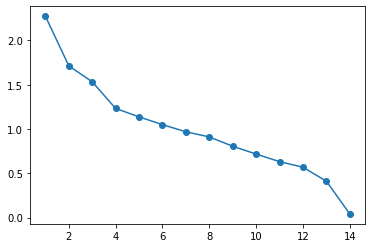

In [25]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)

In [26]:
ev

array([2.27365853, 1.71331194, 1.53318897, 1.23292512, 1.13776269,
       1.04975045, 0.96940112, 0.91125874, 0.80614577, 0.71767191,
       0.63230849, 0.56919405, 0.41133271, 0.04208949])

In [27]:
loading_df= pd.DataFrame.from_records(loadings)
loading_df

,0,1,2,3,4,5
0,0.102501,0.530962,-0.086538,-0.025040,-0.256895,-0.548710
1,0.963247,0.189837,-0.149110,-0.032132,0.010917,0.107868
2,0.008879,-0.005702,0.992492,0.054493,-0.092111,-0.013333
3,0.174286,0.260433,0.060540,0.046500,0.183998,0.133338
4,-0.035542,0.000217,-0.031360,-0.116193,0.227274,0.309751
5,0.048139,0.139032,0.056389,0.980729,-0.027012,-0.090860
6,0.063027,-0.080998,0.038172,0.044336,0.498704,0.115625
7,-0.015132,0.166160,-0.151887,-0.068010,0.631158,-0.043300
8,0.023408,0.477241,-0.039885,-0.005596,0.017297,0.007480
9,0.005783,0.744373,0.057753,0.196829,0.055625,0.189529


In [28]:
loading_df[0]

0     0.102501
1     0.963247
2     0.008879
3     0.174286
4    -0.035542
5     0.048139
6     0.063027
7    -0.015132
8     0.023408
9     0.005783
10   -0.077851
11   -0.101972
12    0.030916
13    0.848285
Name: 0, dtype: float64

In [29]:
data_ftl.columns

Index(['totalkgds', 'pickup_city', 'dropoff_city', 'pickup_address_type',
       'dropoff_address_type', 'category', 'vehicle_type', 'vehicle_body_type',
       'vehicle_package_type', 'vehicle_way_of_loading',
       'vehicle_tonnage_per_vehicle', 'invoice_type', 'usd_tl', 'routes'],
      dtype='object')

In [30]:
loading_df.take([0], axis = 1)

,0
0,0.102501
1,0.963247
2,0.008879
3,0.174286
4,-0.035542
5,0.048139
6,0.063027
7,-0.015132
8,0.023408
9,0.005783


In [31]:
fac1_totalkgds = data_ftl.totalkgds*0.078250
fac1_pickup_city = data_ftl.pickup_city*0.950342
fac1_dropoff_city = data_ftl.dropoff_city*(-0.037468)
fac1_pickup_address_type = data_ftl.pickup_address_type*0.164830
fac1_dropoff_address_type = data_ftl.dropoff_address_type*(-0.039575)
fac1_category = data_ftl.category*0.031995
fac1_vehicle_type = data_ftl.vehicle_type*0.075413
fac1_vehicle_body_type = data_ftl.vehicle_body_type*(-0.013468)
fac1_vehicle_package_type = data_ftl.vehicle_package_type*0.014671
fac1_vehicle_way_of_loading = data_ftl.vehicle_way_of_loading*(-0.069537)
fac1_vehicle_tonnage_per_vehicle = data_ftl.vehicle_tonnage_per_vehicle*(-0.080260)
fac1_invoice_type = data_ftl.invoice_type*0.083153
fac1_usd_tl = data_ftl.usd_tl*0.072662
fac1_routes = data_ftl.routes*0.789931

fac1 = pd.concat([fac1_totalkgds, fac1_pickup_city,fac1_dropoff_city,
           fac1_pickup_address_type,fac1_dropoff_address_type,fac1_category,fac1_vehicle_type,fac1_vehicle_body_type
          ,fac1_vehicle_package_type,fac1_vehicle_way_of_loading,fac1_vehicle_tonnage_per_vehicle,fac1_invoice_type
          ,fac1_usd_tl,fac1_routes], axis = 1)

In [32]:
fac2_totalkgds = data_ftl.totalkgds*0.345776
fac2_pickup_city = data_ftl.pickup_city*0.098796
fac2_dropoff_city = data_ftl.dropoff_city*0.063474
fac2_pickup_address_type = data_ftl.pickup_address_type*0.050793
fac2_dropoff_address_type = data_ftl.dropoff_address_type*(-0.060610)
fac2_category = data_ftl.category*0.095989
fac2_vehicle_type = data_ftl.vehicle_type*0.042075
fac2_vehicle_body_type = data_ftl.vehicle_body_type*-0.003995
fac2_vehicle_package_type = data_ftl.vehicle_package_type*0.510643
fac2_vehicle_way_of_loading = data_ftl.vehicle_way_of_loading*0.930879
fac2_vehicle_tonnage_per_vehicle = data_ftl.vehicle_tonnage_per_vehicle*0.034599
fac2_invoice_type = data_ftl.invoice_type*-0.237656
fac2_usd_tl = data_ftl.usd_tl*0.015132
fac2_routes = data_ftl.routes*0.137691

fac2 = pd.concat([fac2_totalkgds, fac2_pickup_city,fac2_dropoff_city,
           fac2_pickup_address_type,fac2_dropoff_address_type,fac2_category,fac2_vehicle_type,fac2_vehicle_body_type
          ,fac2_vehicle_package_type,fac2_vehicle_way_of_loading,fac2_vehicle_tonnage_per_vehicle,fac2_invoice_type
          ,fac2_usd_tl,fac2_routes], axis = 1)
fac2


,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,invoice_type,usd_tl,routes
61,1728.880,0.098796,0.634740,0.000000,-0.00000,0.767912,0.126225,-0.011985,1.021286,0.930879,0.172995,-0.475312,0.206219,1.789983
66,1037.328,0.098796,0.571266,0.000000,-0.48488,0.863901,0.210375,-0.011985,1.531929,3.723516,0.103797,-0.475312,0.206219,1.652292
359,8644.400,0.098796,0.126948,0.203172,-0.48488,0.959890,0.126225,-0.011985,2.553215,3.723516,0.864975,-0.475312,0.206399,0.688455
361,1383.104,0.098796,0.952110,0.000000,-0.18183,0.959890,0.000000,-0.011985,2.553215,3.723516,0.000000,-0.475312,0.206399,2.478438
365,8298.624,0.000000,1.015584,0.000000,-0.48488,0.191978,0.126225,-0.000000,2.553215,3.723516,0.830376,-0.237656,0.206399,0.275382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34585,4495.088,0.000000,1.015584,0.000000,-0.36366,0.767912,0.210375,-0.011985,1.021286,1.861758,0.449787,-0.237656,0.124998,0.275382
34673,345.776,0.000000,0.952110,0.000000,-0.36366,0.095989,0.084150,-0.003995,1.021286,0.930879,0.034599,-0.475312,0.125915,0.137691
34723,345.776,0.000000,0.952110,0.000000,-0.36366,0.095989,0.084150,-0.003995,1.021286,0.930879,0.034599,-0.475312,0.125915,0.137691
34965,345.776,0.000000,0.952110,0.000000,-0.36366,0.095989,0.084150,-0.003995,1.021286,0.930879,0.034599,-0.475312,0.126428,0.137691


In [33]:
fac3_totalkgds = data_ftl.totalkgds*(-0.110298)
fac3_pickup_city = data_ftl.pickup_city*(-0.124441)
fac3_dropoff_city = data_ftl.dropoff_city*0.960476
fac3_pickup_address_type = data_ftl.pickup_address_type*-0.003301
fac3_dropoff_address_type = data_ftl.dropoff_address_type*-0.089272
fac3_category = data_ftl.category*0.043898
fac3_vehicle_type = data_ftl.vehicle_type*0.027063
fac3_vehicle_body_type = data_ftl.vehicle_body_type*(-0.213841)
fac3_vehicle_package_type = data_ftl.vehicle_package_type*(-0.021827)
fac3_vehicle_way_of_loading = data_ftl.vehicle_way_of_loading*0.117737
fac3_vehicle_tonnage_per_vehicle = data_ftl.vehicle_tonnage_per_vehicle*0.018713
fac3_invoice_type = data_ftl.invoice_type*(-0.083780)
fac3_usd_tl = data_ftl.usd_tl*(-0.057609)
fac3_routes = data_ftl.routes*0.501614

fac3 = pd.concat([fac3_totalkgds, fac3_pickup_city,fac3_dropoff_city,
           fac3_pickup_address_type,fac3_dropoff_address_type,fac3_category,fac3_vehicle_type,fac3_vehicle_body_type
          ,fac3_vehicle_package_type,fac3_vehicle_way_of_loading,fac3_vehicle_tonnage_per_vehicle,fac3_invoice_type
          ,fac3_usd_tl,fac3_routes], axis = 1)
fac3


,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,invoice_type,usd_tl,routes
61,-551.490,-0.124441,9.604760,-0.000000,-0.000000,0.351184,0.081189,-0.641523,-0.043654,0.117737,0.093565,-0.16756,-0.785095,6.520982
66,-330.894,-0.124441,8.644284,-0.000000,-0.714176,0.395082,0.135315,-0.641523,-0.065481,0.470948,0.056139,-0.16756,-0.785095,6.019368
359,-2757.450,-0.124441,1.920952,-0.013204,-0.714176,0.438980,0.081189,-0.641523,-0.109135,0.470948,0.467825,-0.16756,-0.785781,2.508070
361,-441.192,-0.124441,14.407140,-0.000000,-0.267816,0.438980,0.000000,-0.641523,-0.109135,0.470948,0.000000,-0.16756,-0.785781,9.029052
365,-2647.152,-0.000000,15.367616,-0.000000,-0.714176,0.087796,0.081189,-0.000000,-0.109135,0.470948,0.449112,-0.08378,-0.785781,1.003228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34585,-1433.874,-0.000000,15.367616,-0.000000,-0.535632,0.351184,0.135315,-0.641523,-0.043654,0.235474,0.243269,-0.08378,-0.475879,1.003228
34673,-110.298,-0.000000,14.407140,-0.000000,-0.535632,0.043898,0.054126,-0.213841,-0.043654,0.117737,0.018713,-0.16756,-0.479370,0.501614
34723,-110.298,-0.000000,14.407140,-0.000000,-0.535632,0.043898,0.054126,-0.213841,-0.043654,0.117737,0.018713,-0.16756,-0.479370,0.501614
34965,-110.298,-0.000000,14.407140,-0.000000,-0.535632,0.043898,0.054126,-0.213841,-0.043654,0.117737,0.018713,-0.16756,-0.481323,0.501614


In [34]:
loading_df.take([3], axis = 1)

,3
0,-0.025040
1,-0.032132
2,0.054493
3,0.046500
4,-0.116193
5,0.980729
6,0.044336
7,-0.068010
8,-0.005596
9,0.196829


In [35]:
fac4_totalkgds = data_ftl.totalkgds*(-0.178464)
fac4_pickup_city = data_ftl.pickup_city*(-0.064645)
fac4_dropoff_city = data_ftl.dropoff_city*0.018128
fac4_pickup_address_type = data_ftl.pickup_address_type*0.033266
fac4_dropoff_address_type = data_ftl.dropoff_address_type*0.043083
fac4_category = data_ftl.category*(-0.017521)
fac4_vehicle_type = data_ftl.vehicle_type*0.989423
fac4_vehicle_body_type = data_ftl.vehicle_body_type*0.236771
fac4_vehicle_package_type = data_ftl.vehicle_package_type*0.023026
fac4_vehicle_way_of_loading = data_ftl.vehicle_way_of_loading*(-0.011988)
fac4_vehicle_tonnage_per_vehicle = data_ftl.vehicle_tonnage_per_vehicle*(-0.033938)
fac4_invoice_type = data_ftl.invoice_type*(-0.077356)
fac4_usd_tl = data_ftl.usd_tl*(-0.010881)
fac4_routes = data_ftl.routes*(-0.018471)

fac4 = pd.concat([fac4_totalkgds, fac4_pickup_city,fac4_dropoff_city,
           fac4_pickup_address_type,fac4_dropoff_address_type,fac4_category,fac4_vehicle_type,fac4_vehicle_body_type
          ,fac4_vehicle_package_type,fac4_vehicle_way_of_loading,fac4_vehicle_tonnage_per_vehicle,fac4_invoice_type
          ,fac4_usd_tl,fac4_routes], axis = 1)
fac4

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,invoice_type,usd_tl,routes
61,-892.320,-0.064645,0.181280,0.000000,0.000000,-0.140168,2.968269,0.710313,0.046052,-0.011988,-0.169690,-0.154712,-0.148286,-0.240123
66,-535.392,-0.064645,0.163152,0.000000,0.344664,-0.157689,4.947115,0.710313,0.069078,-0.047952,-0.101814,-0.154712,-0.148286,-0.221652
359,-4461.600,-0.064645,0.036256,0.133064,0.344664,-0.175210,2.968269,0.710313,0.115130,-0.047952,-0.848450,-0.154712,-0.148416,-0.092355
361,-713.856,-0.064645,0.271920,0.000000,0.129249,-0.175210,0.000000,0.710313,0.115130,-0.047952,-0.000000,-0.154712,-0.148416,-0.332478
365,-4283.136,-0.000000,0.290048,0.000000,0.344664,-0.035042,2.968269,0.000000,0.115130,-0.047952,-0.814512,-0.077356,-0.148416,-0.036942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34585,-2320.032,-0.000000,0.290048,0.000000,0.258498,-0.140168,4.947115,0.710313,0.046052,-0.023976,-0.441194,-0.077356,-0.089883,-0.036942
34673,-178.464,-0.000000,0.271920,0.000000,0.258498,-0.017521,1.978846,0.236771,0.046052,-0.011988,-0.033938,-0.154712,-0.090542,-0.018471
34723,-178.464,-0.000000,0.271920,0.000000,0.258498,-0.017521,1.978846,0.236771,0.046052,-0.011988,-0.033938,-0.154712,-0.090542,-0.018471
34965,-178.464,-0.000000,0.271920,0.000000,0.258498,-0.017521,1.978846,0.236771,0.046052,-0.011988,-0.033938,-0.154712,-0.090911,-0.018471


In [36]:
fac5_totalkgds = data_ftl.totalkgds*(-0.520783)
fac5_pickup_city = data_ftl.pickup_city*0.131343
fac5_dropoff_city = data_ftl.dropoff_city*(-0.170131)
fac5_pickup_address_type = data_ftl.pickup_address_type*0.224468
fac5_dropoff_address_type = data_ftl.dropoff_address_type*0.532523
fac5_category = data_ftl.category*(-0.064034)
fac5_vehicle_type = data_ftl.vehicle_type*0.087967
fac5_vehicle_body_type = data_ftl.vehicle_body_type*0.221259
fac5_vehicle_package_type = data_ftl.vehicle_package_type*(-0.125381)
fac5_vehicle_way_of_loading = data_ftl.vehicle_way_of_loading*0.046013
fac5_vehicle_tonnage_per_vehicle = data_ftl.vehicle_tonnage_per_vehicle*0.009208
fac5_invoice_type = data_ftl.invoice_type*(-0.014721)
fac5_usd_tl = data_ftl.usd_tl*0.349627
fac5_routes = data_ftl.routes*0.010346

fac5 = pd.concat([fac5_totalkgds, fac5_pickup_city,fac5_dropoff_city,
           fac5_pickup_address_type,fac5_dropoff_address_type,fac5_category,fac5_vehicle_type,fac5_vehicle_body_type
          ,fac5_vehicle_package_type,fac5_vehicle_way_of_loading,fac5_vehicle_tonnage_per_vehicle,fac5_invoice_type
          ,fac5_usd_tl,fac5_routes], axis = 1)
fac5

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,invoice_type,usd_tl,routes
61,-2603.915,0.131343,-1.701310,0.000000,0.000000,-0.512272,0.263901,0.663777,-0.250762,0.046013,0.046040,-0.029442,4.764717,0.134498
66,-1562.349,0.131343,-1.531179,0.000000,4.260184,-0.576306,0.439835,0.663777,-0.376143,0.184052,0.027624,-0.029442,4.764717,0.124152
359,-13019.575,0.131343,-0.340262,0.897872,4.260184,-0.640340,0.263901,0.663777,-0.626905,0.184052,0.230200,-0.029442,4.768877,0.051730
361,-2083.132,0.131343,-2.551965,0.000000,1.597569,-0.640340,0.000000,0.663777,-0.626905,0.184052,0.000000,-0.029442,4.768877,0.186228
365,-12498.792,0.000000,-2.722096,0.000000,4.260184,-0.128068,0.263901,0.000000,-0.626905,0.184052,0.220992,-0.014721,4.768877,0.020692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34585,-6770.179,0.000000,-2.722096,0.000000,3.195138,-0.512272,0.439835,0.663777,-0.250762,0.092026,0.119704,-0.014721,2.888094,0.020692
34673,-520.783,0.000000,-2.551965,0.000000,3.195138,-0.064034,0.175934,0.221259,-0.250762,0.046013,0.009208,-0.029442,2.909281,0.010346
34723,-520.783,0.000000,-2.551965,0.000000,3.195138,-0.064034,0.175934,0.221259,-0.250762,0.046013,0.009208,-0.029442,2.909281,0.010346
34965,-520.783,0.000000,-2.551965,0.000000,3.195138,-0.064034,0.175934,0.221259,-0.250762,0.046013,0.009208,-0.029442,2.921134,0.010346


In [37]:
loading_df.take([5], axis = 1)

,5
0,-0.548710
1,0.107868
2,-0.013333
3,0.133338
4,0.309751
5,-0.090860
6,0.115625
7,-0.043300
8,0.007480
9,0.189529


In [38]:
fac6_totalkgds = data_ftl.totalkgds*0.182620
fac6_pickup_city = data_ftl.pickup_city*0.227059
fac6_dropoff_city = data_ftl.dropoff_city*(-0.068180)
fac6_pickup_address_type = data_ftl.pickup_address_type*0.400766
fac6_dropoff_address_type = data_ftl.dropoff_address_type*0.128746
fac6_category = data_ftl.category*0.166031
fac6_vehicle_type = data_ftl.vehicle_type*0.011734
fac6_vehicle_body_type = data_ftl.vehicle_body_type*0.366239
fac6_vehicle_package_type = data_ftl.vehicle_package_type*0.025663
fac6_vehicle_way_of_loading = data_ftl.vehicle_way_of_loading*0.045626
fac6_vehicle_tonnage_per_vehicle = data_ftl.vehicle_tonnage_per_vehicle*0.020292
fac6_invoice_type = data_ftl.invoice_type*0.301998
fac6_usd_tl = data_ftl.usd_tl*0.018955
fac6_routes = data_ftl.routes*0.103540

fac6 = pd.concat([fac6_totalkgds, fac6_pickup_city,fac6_dropoff_city,
           fac6_pickup_address_type,fac6_dropoff_address_type,fac6_category,fac6_vehicle_type,fac6_vehicle_body_type
          ,fac6_vehicle_package_type,fac6_vehicle_way_of_loading,fac6_vehicle_tonnage_per_vehicle,fac6_invoice_type
          ,fac6_usd_tl,fac6_routes], axis = 1)
fac6

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,invoice_type,usd_tl,routes
61,913.10,0.227059,-0.68180,0.000000,0.000000,1.328248,0.035202,1.098717,0.051326,0.045626,0.101460,0.603996,0.258319,1.34602
66,547.86,0.227059,-0.61362,0.000000,1.029968,1.494279,0.058670,1.098717,0.076989,0.182504,0.060876,0.603996,0.258319,1.24248
359,4565.50,0.227059,-0.13636,1.603064,1.029968,1.660310,0.035202,1.098717,0.128315,0.182504,0.507300,0.603996,0.258544,0.51770
361,730.48,0.227059,-1.02270,0.000000,0.386238,1.660310,0.000000,1.098717,0.128315,0.182504,0.000000,0.603996,0.258544,1.86372
365,4382.88,0.000000,-1.09088,0.000000,1.029968,0.332062,0.035202,0.000000,0.128315,0.182504,0.487008,0.301998,0.258544,0.20708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34585,2374.06,0.000000,-1.09088,0.000000,0.772476,1.328248,0.058670,1.098717,0.051326,0.091252,0.263796,0.301998,0.156578,0.20708
34673,182.62,0.000000,-1.02270,0.000000,0.772476,0.166031,0.023468,0.366239,0.051326,0.045626,0.020292,0.603996,0.157726,0.10354
34723,182.62,0.000000,-1.02270,0.000000,0.772476,0.166031,0.023468,0.366239,0.051326,0.045626,0.020292,0.603996,0.157726,0.10354
34965,182.62,0.000000,-1.02270,0.000000,0.772476,0.166031,0.023468,0.366239,0.051326,0.045626,0.020292,0.603996,0.158369,0.10354


In [39]:
new_predictors = pd.concat([fac1.sum(axis=1),fac2.sum(axis=1),fac3.sum(axis=1),fac4.sum(axis=1),
                            fac5.sum(axis=1),fac6.sum(axis=1)],axis = 1)
new_predictors

,0,1,2,3,4,5
61,403.251609,1734.141738,-536.482856,-889.343698,-2600.358497,917.514173
66,245.831947,1045.317914,-317.671140,-530.054428,-1554.266386,553.580237
359,1960.869681,8652.979414,-2754.117856,-4458.824044,-13009.760013,4573.216319
361,328.720516,1393.407237,-418.942136,-713.552801,-2079.448806,735.866703
365,1877.897225,8306.824139,-2631.384983,-4280.578109,-12492.565092,4384.751801
...,...,...,...,...,...,...
34585,1018.115810,4500.201781,-1418.318382,-2314.589493,-6766.259585,2377.299261
34673,79.060293,348.315652,-96.594829,-175.999085,-517.112024,183.908020
34723,79.060293,348.315652,-96.594829,-175.999085,-517.112024,183.908020
34965,79.062756,348.316165,-96.596782,-175.999454,-517.100171,183.908663


In [40]:
X_train_ftl, X_test_ftl, y_train_ftl, y_test_ftl = train_test_split(new_predictors,total_cost , test_size=0.2, random_state=0)
X_train_ftl.shape, X_test_ftl.shape

((884, 6), (222, 6))

In [41]:
dtreg = DecisionTreeRegressor(random_state= 0)

In [42]:
dtreg.fit(X_train_ftl,y_train_ftl)

DecisionTreeRegressor(random_state=0)

In [43]:
predict_dtr = dtreg.predict(X_test_ftl)

In [44]:
r_square = metrics.r2_score(y_test_ftl, predict_dtr)
r_square

0.4467079200033083

In [45]:
def get_stats_ftl():
    y = y_train_ftl
    x = X_train_ftl
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats_ftl()

                               OLS Regression Results                              
Dep. Variable:     total_cost_amount_in_tl   R-squared:                       0.249
Model:                                 OLS   Adj. R-squared:                  0.244
Method:                      Least Squares   F-statistic:                     48.54
Date:                     Fri, 25 Feb 2022   Prob (F-statistic):           1.51e-51
Time:                             12:58:01   Log-Likelihood:                -7799.0
No. Observations:                      884   AIC:                         1.561e+04
Df Residuals:                          877   BIC:                         1.565e+04
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [46]:
X_train_ftl = X_train_ftl.drop(X_train_ftl.iloc[:, [1, 1]], axis=1)
X_test_ftl = X_test_ftl.drop(X_test_ftl.iloc[:, [1, 1]], axis=1)

get_stats_ftl()

                               OLS Regression Results                              
Dep. Variable:     total_cost_amount_in_tl   R-squared:                       0.248
Model:                                 OLS   Adj. R-squared:                  0.244
Method:                      Least Squares   F-statistic:                     58.00
Date:                     Fri, 25 Feb 2022   Prob (F-statistic):           3.37e-52
Time:                             12:58:01   Log-Likelihood:                -7799.6
No. Observations:                      884   AIC:                         1.561e+04
Df Residuals:                          878   BIC:                         1.564e+04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [47]:
X_train_ftl = X_train_ftl.drop(X_train_ftl.iloc[:, [4, 4]], axis=1)
X_test_ftl = X_test_ftl.drop(X_test_ftl.iloc[:, [4, 4]], axis=1)
get_stats_ftl()

                               OLS Regression Results                              
Dep. Variable:     total_cost_amount_in_tl   R-squared:                       0.248
Model:                                 OLS   Adj. R-squared:                  0.245
Method:                      Least Squares   F-statistic:                     72.49
Date:                     Fri, 25 Feb 2022   Prob (F-statistic):           4.25e-53
Time:                             12:58:01   Log-Likelihood:                -7799.8
No. Observations:                      884   AIC:                         1.561e+04
Df Residuals:                          879   BIC:                         1.563e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [48]:
X_train_ftl = sm.add_constant(X_train_ftl)
X_test_ftl = sm.add_constant(X_test_ftl)

ftl_results = sm.OLS(y_train_ftl, X_train_ftl).fit()
ftl_predict = ftl_results.predict(X_test_ftl)

195440974.0542392

In [52]:
metrics.r2_score(y_test_ftl,ftl_predict)

0.294924323483445